In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Load the dataset into a DataFrame
df = pd.read_json('/kaggle/input/twitter-new-dataset-2024-march-data/dataset_tweet-scraper_2024-03-04_15-52-13-507.json')

# Check the first few rows of the DataFrame
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())


/kaggle/input/twitter-new-dataset-2024-march-data/dataset_tweet-scraper_2024-03-04_15-52-13-507.json
    type                   id  \
0  tweet  1762265250987201024   
1  tweet  1762265102085165568   
2  tweet  1762264840154857472   
3  tweet  1762264888053821696   
4  tweet  1762264739139510784   

                                                 url  \
0  https://x.com/FmGuerralves/status/176226525098...   
1  https://x.com/CynthiaGur93764/status/176226510...   
2  https://x.com/nelsonakange/status/176226484015...   
3  https://x.com/NikolajMeedom/status/17622648880...   
4  https://x.com/GaryGevisser/status/176226473913...   

                                          twitterUrl  \
0  https://twitter.com/FmGuerralves/status/176226...   
1  https://twitter.com/CynthiaGur93764/status/176...   
2  https://twitter.com/nelsonakange/status/176226...   
3  https://twitter.com/NikolajMeedom/status/17622...   
4  https://twitter.com/GaryGevisser/status/176226...   

                          

In [7]:
# Load the dataset into a DataFrame
df = pd.read_json('/kaggle/input/twitter-new-dataset-2024-march-data/dataset_tweet-scraper_2024-03-04_15-52-13-507.json')


In [73]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (e.g., drop rows with missing values)
df.dropna(inplace=True)


index               0
type                0
id                  0
url                 0
twitterUrl          0
text                0
retweetCount        0
replyCount          0
likeCount           0
quoteCount          0
viewCount           0
createdAt           0
lang                0
bookmarkCount       0
isReply             0
author              0
extendedEntities    0
entities            0
isRetweet           0
isQuote             0
media               0
quoteId             0
quote               0
sentiment           0
text_polarity       0
has_media           0
has_url             0
num_hashtags        0
dtype: int64


In [74]:
# Remove duplicate rows based on specific columns
df.drop_duplicates(subset=['id'], inplace=True)


# Clean text data (e.g., remove special characters, convert to lowercase)
df['text'] = df['text'].str.replace('[^a-zA-Z0-9\s]', '')
df['text'] = df['text'].str.lower()


In [78]:
# Check the column names in the DataFrame
print(df.columns)

# Assuming the column representing the creation date is named 'createdAt'
# Assuming the format of the datetime strings in the 'createdAt' column is '%Y-%m-%d %H:%M:%S'
df['createdAt'] = pd.to_datetime(df['createdAt'], format='%Y-%m-%d %H:%M:%S')


Index(['index', 'type', 'id', 'url', 'twitterUrl', 'text', 'retweetCount',
       'replyCount', 'likeCount', 'quoteCount', 'viewCount', 'createdAt',
       'lang', 'bookmarkCount', 'isReply', 'author', 'extendedEntities',
       'entities', 'isRetweet', 'isQuote', 'media', 'quoteId', 'quote',
       'sentiment', 'text_polarity', 'has_media', 'has_url', 'num_hashtags',
       'hour'],
      dtype='object')


In [79]:
# Visualizations (example)
import matplotlib.pyplot as plt
import seaborn as sns


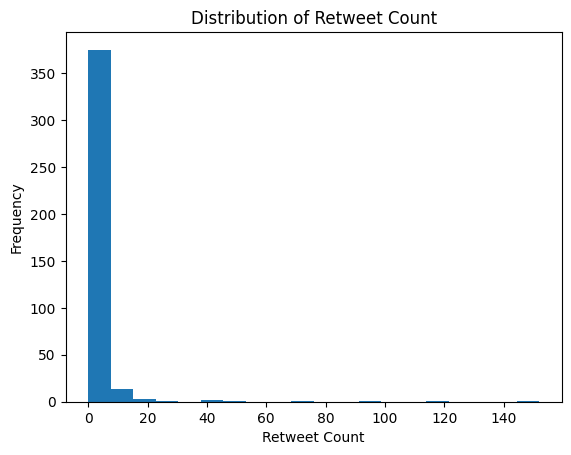

In [80]:
# Histogram of retweet count
plt.hist(df['retweetCount'], bins=20)
plt.xlabel('Retweet Count')
plt.ylabel('Frequency')
plt.title('Distribution of Retweet Count')
plt.show()

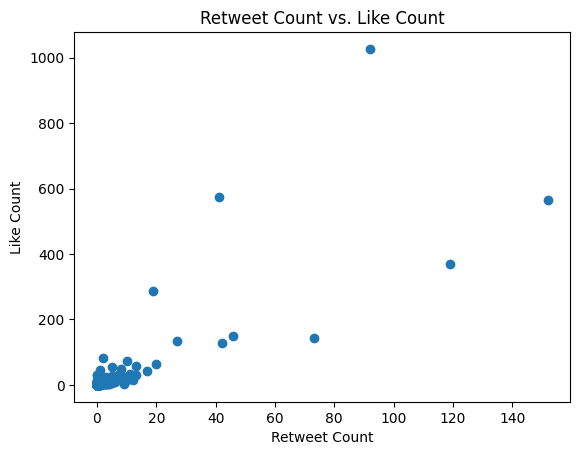

In [81]:
# Scatter plot of retweet count vs. like count
plt.scatter(df['retweetCount'], df['likeCount'])
plt.xlabel('Retweet Count')
plt.ylabel('Like Count')
plt.title('Retweet Count vs. Like Count')
plt.show()

In [82]:
# Sentiment analysis (example using TextBlob)
from textblob import TextBlob

In [83]:
# Calculate sentiment polarity for each tweet
df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


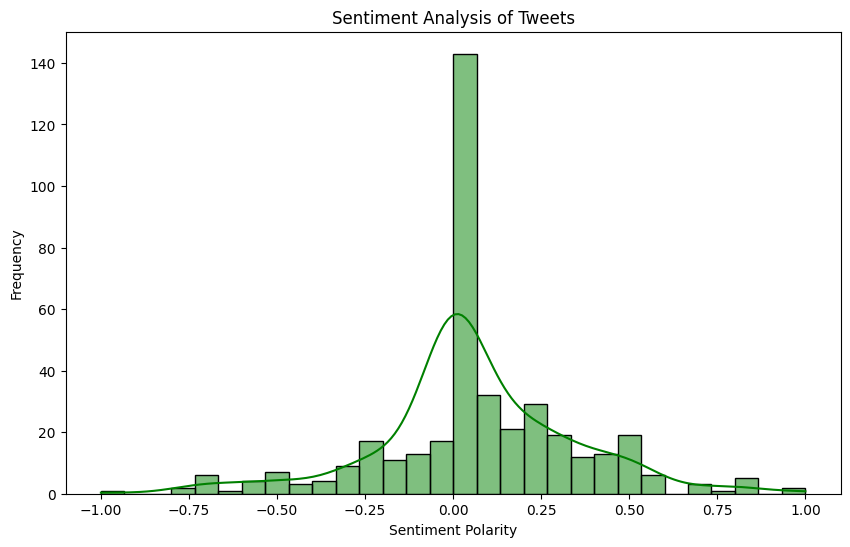

In [85]:
# Sentiment Analysis Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=30, kde=True, color='green')
plt.title('Sentiment Analysis of Tweets')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


In [103]:
# Trend Analysis: Identify trending topics or hashtags
# Assuming hashtags are in the 'entities' column
from collections import Counter


In [105]:
hashtags = []
for entities in df['entities']:
    if 'hashtags' in entities:
        hashtags.extend([tag['text'] for tag in entities['hashtags']])

In [106]:
# Count the frequency of each hashtag
hashtag_counts = Counter(hashtags)

In [107]:
# Visualize the top 10 hashtags
top_hashtags = hashtag_counts.most_common(10)
top_hashtags_df = pd.DataFrame(top_hashtags, columns=['Hashtag', 'Frequency'])

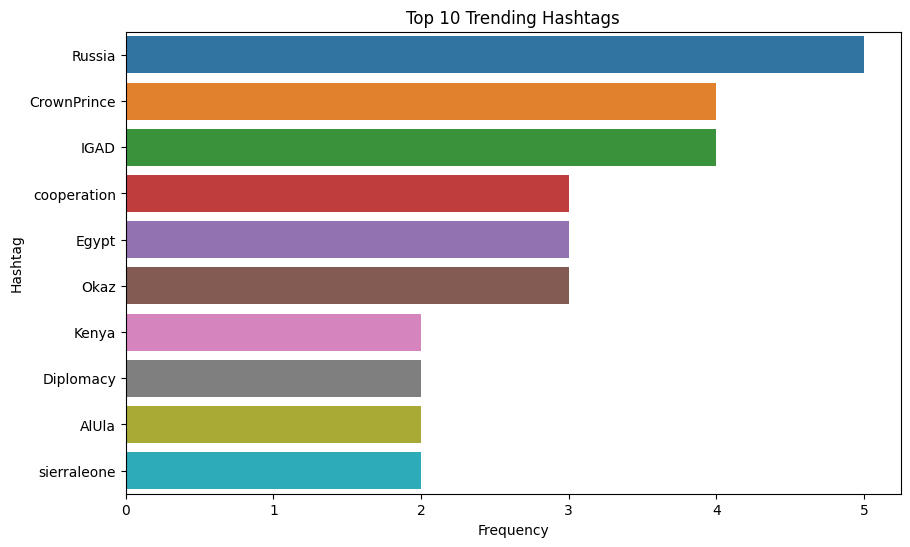

In [108]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Hashtag', data=top_hashtags_df)
plt.title('Top 10 Trending Hashtags')
plt.xlabel('Frequency')
plt.ylabel('Hashtag')
plt.show()

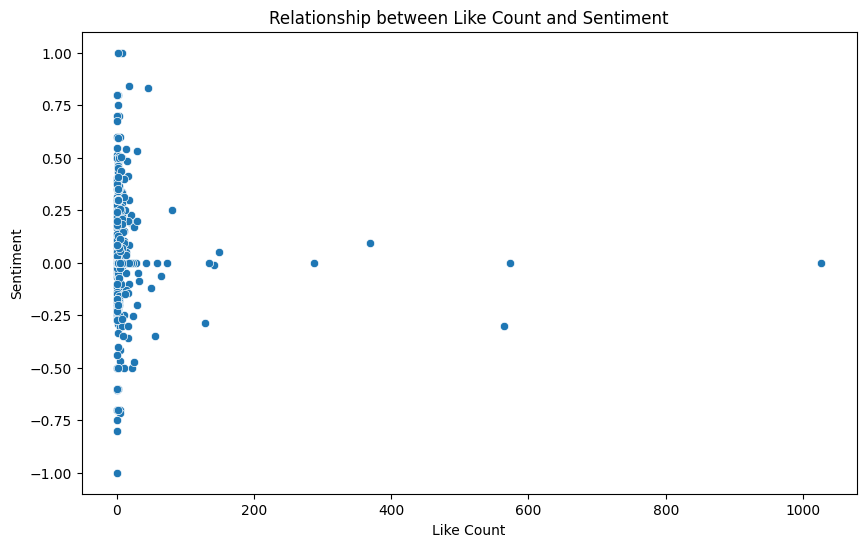

In [109]:
# Engagement Analysis: Relationship between engagement metrics and sentiment
plt.figure(figsize=(10, 6))
sns.scatterplot(x='likeCount', y='sentiment', data=df)
plt.title('Relationship between Like Count and Sentiment')
plt.xlabel('Like Count')
plt.ylabel('Sentiment')
plt.show()

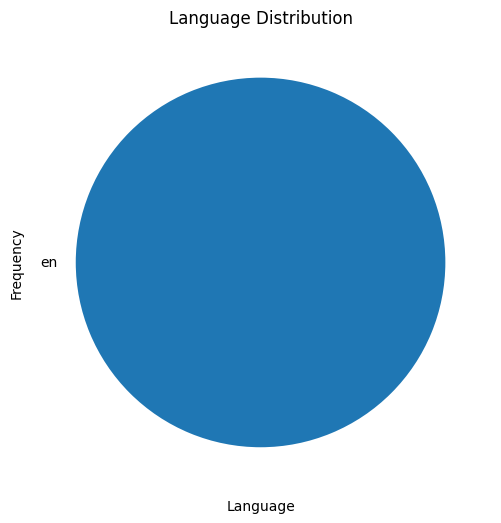

In [110]:
# Language Distribution
plt.figure(figsize=(10, 6))
df['lang'].value_counts().plot(kind='pie')
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


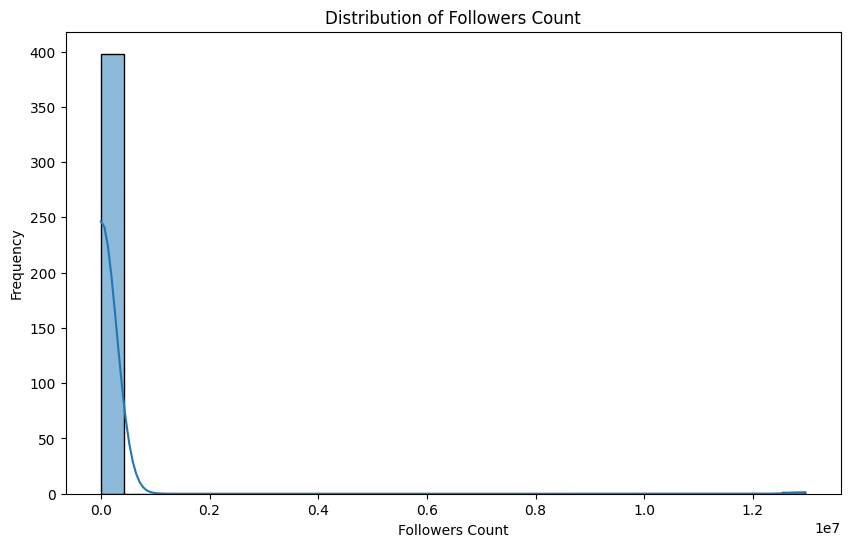

In [111]:
# User Behavior Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['author'].apply(lambda x: x['followers']), bins=30, kde=True)
plt.title('Distribution of Followers Count')
plt.xlabel('Followers Count')
plt.ylabel('Frequency')
plt.show()


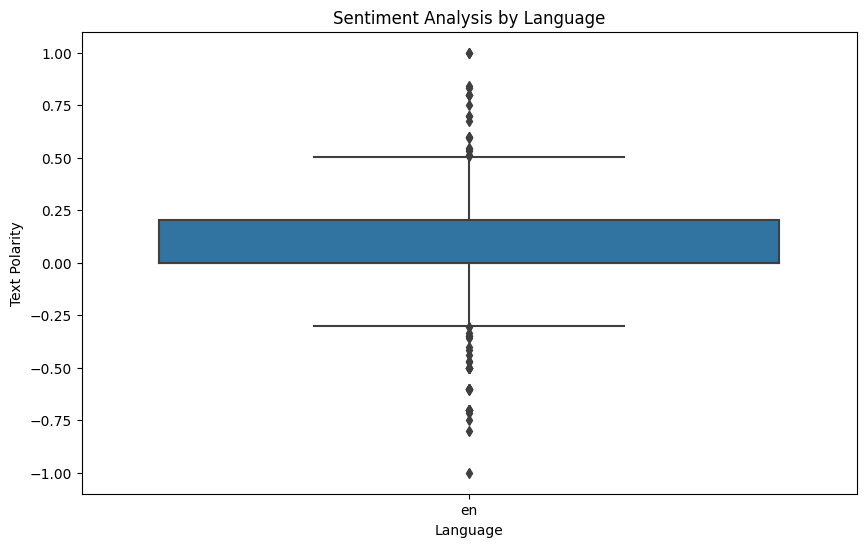

In [91]:
# Sentiment Analysis
from textblob import TextBlob

df['text_polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(10, 6))
sns.boxplot(x='lang', y='text_polarity', data=df)
plt.title('Sentiment Analysis by Language')
plt.xlabel('Language')
plt.ylabel('Text Polarity')
plt.show()

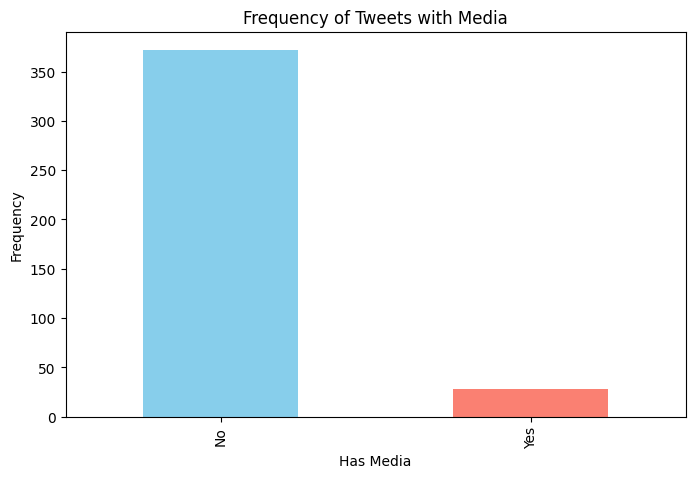

In [92]:
# Media Analysis
df['has_media'] = df['media'].apply(lambda x: len(x) > 0)

plt.figure(figsize=(8, 5))
df['has_media'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Frequency of Tweets with Media')
plt.xlabel('Has Media')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [28]:

print(df['author'].head())

print(df['entities'].head())


0    {'type': 'user', 'userName': 'FmGuerralves', '...
1    {'type': 'user', 'userName': 'CynthiaGur93764'...
2    {'type': 'user', 'userName': 'nelsonakange', '...
3    {'type': 'user', 'userName': 'NikolajMeedom', ...
4    {'type': 'user', 'userName': 'GaryGevisser', '...
Name: author, dtype: object
0    {'hashtags': [{'indices': [131, 138], 'text': ...
1    {'hashtags': [], 'symbols': [], 'urls': [], 'u...
2    {'hashtags': [], 'symbols': [], 'urls': [], 'u...
3    {'hashtags': [], 'symbols': [], 'urls': [], 'u...
4    {'hashtags': [], 'symbols': [], 'urls': [], 'u...
Name: entities, dtype: object


In [29]:
for column in df.columns:
    print(column)
    print(df[column].head())
    print('\n')


type
0    tweet
1    tweet
2    tweet
3    tweet
4    tweet
Name: type, dtype: object


id
0    1762265250987201024
1    1762265102085165568
2    1762264840154857472
3    1762264888053821696
4    1762264739139510784
Name: id, dtype: int64


url
0    https://x.com/FmGuerralves/status/176226525098...
1    https://x.com/CynthiaGur93764/status/176226510...
2    https://x.com/nelsonakange/status/176226484015...
3    https://x.com/NikolajMeedom/status/17622648880...
4    https://x.com/GaryGevisser/status/176226473913...
Name: url, dtype: object


twitterUrl
0    https://twitter.com/FmGuerralves/status/176226...
1    https://twitter.com/CynthiaGur93764/status/176...
2    https://twitter.com/nelsonakange/status/176226...
3    https://twitter.com/NikolajMeedom/status/17622...
4    https://twitter.com/GaryGevisser/status/176226...
Name: twitterUrl, dtype: object


text
0    "Historic visit by French Minister for Home Af...
1    😐😙😆🧏‍♀️😩👨‍🦱\n wear interview sometimes fast co...
2    The Directora

In [30]:
# Check if 'text' column contains timestamp information
print(df['text'].head())


0    "Historic visit by French Minister for Home Af...
1    😐😙😆🧏‍♀️😩👨‍🦱\n wear interview sometimes fast co...
2    The Directorate of Technical Cooperation in Af...
3    It almost seems that a foreign policy based on...
4    Subject: Reason for optimism is that it is now...
Name: text, dtype: object


In [31]:
df.reset_index(inplace=True)

print(df['createdAt'].head())


0    Mon Feb 26 23:55:51 +0000 2024
1    Mon Feb 26 23:55:16 +0000 2024
2    Mon Feb 26 23:54:13 +0000 2024
3    Mon Feb 26 23:54:25 +0000 2024
4    Mon Feb 26 23:53:49 +0000 2024
Name: createdAt, dtype: object


In [32]:
print(df['createdAt'].head())


0    Mon Feb 26 23:55:51 +0000 2024
1    Mon Feb 26 23:55:16 +0000 2024
2    Mon Feb 26 23:54:13 +0000 2024
3    Mon Feb 26 23:54:25 +0000 2024
4    Mon Feb 26 23:53:49 +0000 2024
Name: createdAt, dtype: object


<Figure size 800x500 with 0 Axes>

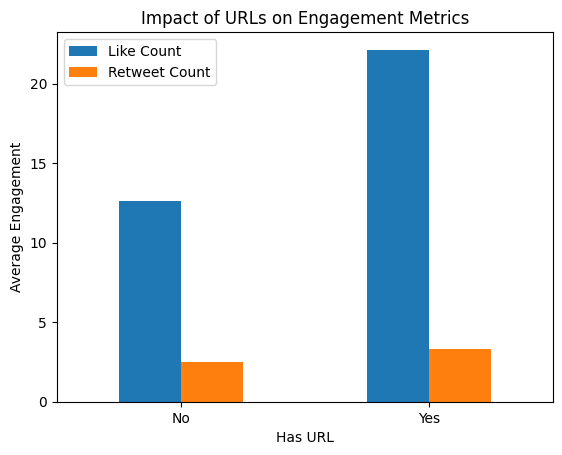

In [93]:
# URL Analysis
df['has_url'] = df['entities'].apply(lambda x: len(x.get('urls', [])) > 0)

plt.figure(figsize=(8, 5))
df.groupby('has_url').agg({
    'likeCount': 'mean',
    'retweetCount': 'mean',
}).plot(kind='bar')
plt.title('Impact of URLs on Engagement Metrics')
plt.xlabel('Has URL')
plt.ylabel('Average Engagement')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.legend(['Like Count', 'Retweet Count'])
plt.show()

In [94]:
# Geographical Analysis (if location data is available)
if 'location' in df.columns:
    plt.figure(figsize=(10, 6))
    df['location'].value_counts().head(10).plot(kind='bar')
    plt.title('Top 10 Tweet Locations')
    plt.xlabel('Location')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Location data not available in the dataset.")

Location data not available in the dataset.


In [95]:
# Topic Modeling: Identify key topics or themes of discussion
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [96]:
# Tokenize and vectorize tweet text
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])


In [97]:
# Perform Latent Dirichlet Allocation (LDA) for topic modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # Assuming 5 topics
lda.fit(X)

LatentDirichletAllocation(n_components=5, random_state=42)

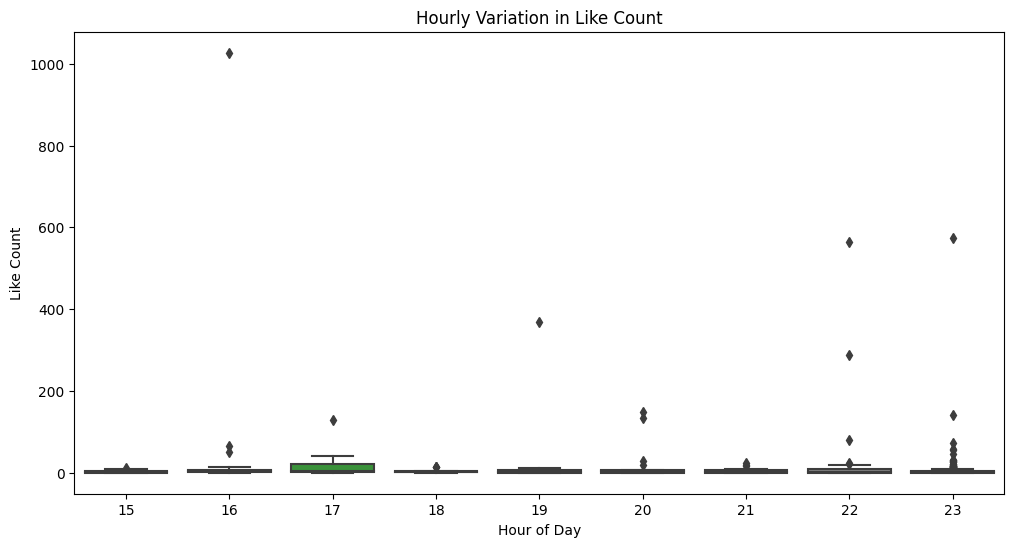

In [126]:
# User Engagement Patterns: Analyze engagement variation based on time and hashtags
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek

plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='likeCount', data=df)
plt.title('Hourly Variation in Like Count')
plt.xlabel('Hour of Day')
plt.ylabel('Like Count')
plt.show()



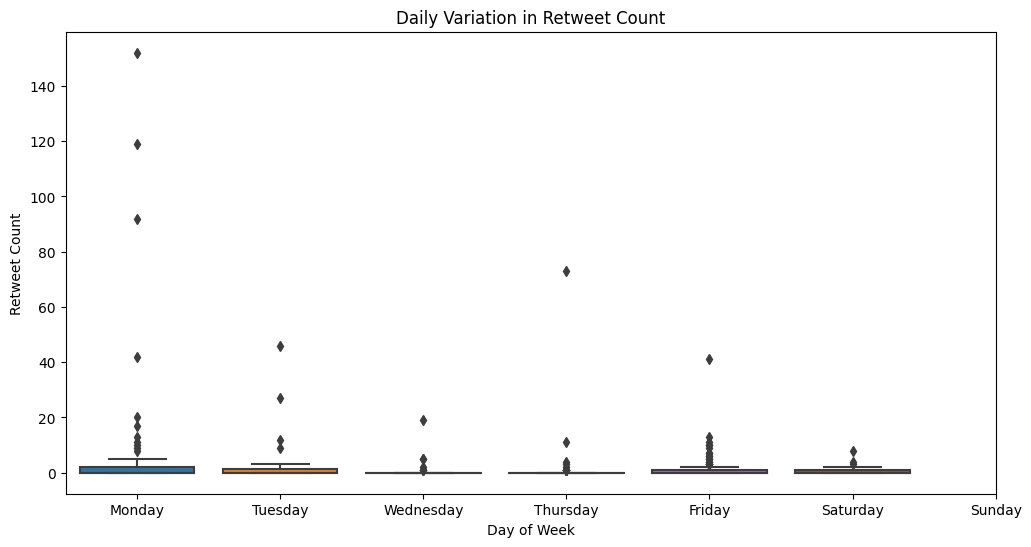

In [127]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_week', y='retweetCount', data=df)
plt.title('Daily Variation in Retweet Count')
plt.xlabel('Day of Week')
plt.ylabel('Retweet Count')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()


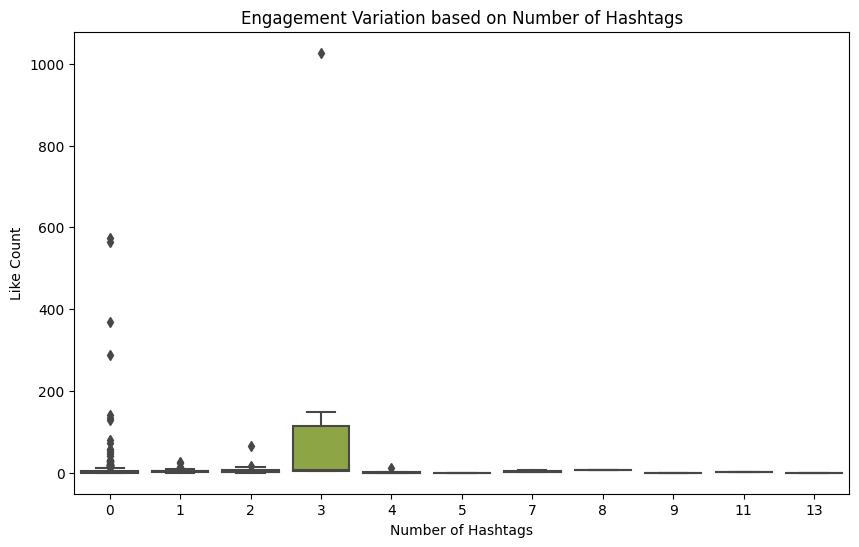

In [98]:
# Analyze engagement based on the number of hashtags
df['num_hashtags'] = df['entities'].apply(lambda x: len(x.get('hashtags', [])))

plt.figure(figsize=(10, 6))
sns.boxplot(x='num_hashtags', y='likeCount', data=df)
plt.title('Engagement Variation based on Number of Hashtags')
plt.xlabel('Number of Hashtags')
plt.ylabel('Like Count')
plt.show()

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


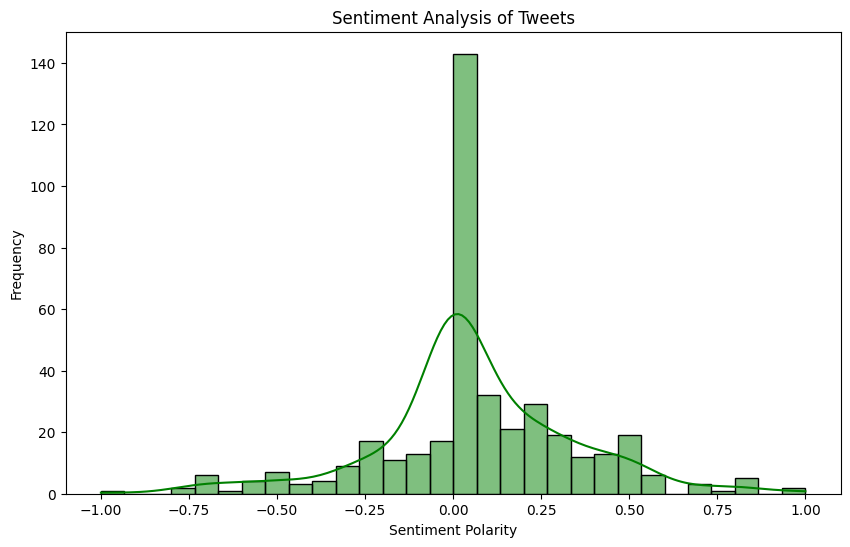

In [100]:
# Sentiment Analysis Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=30, kde=True, color='green')
plt.title('Sentiment Analysis of Tweets')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


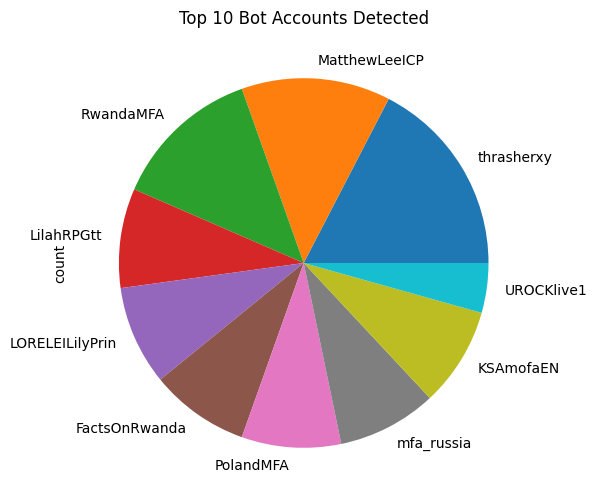

In [101]:
# Bot Detection Visualization
plt.figure(figsize=(8, 6))
bot_accounts['author'].apply(lambda x: x['userName']).value_counts().head(10).plot(kind='pie', color='green')
plt.title('Top 10 Bot Accounts Detected')
#plt.xlabel('User Name')
#plt.ylabel('Frequency')
#plt.xticks(rotation=45)
plt.show()


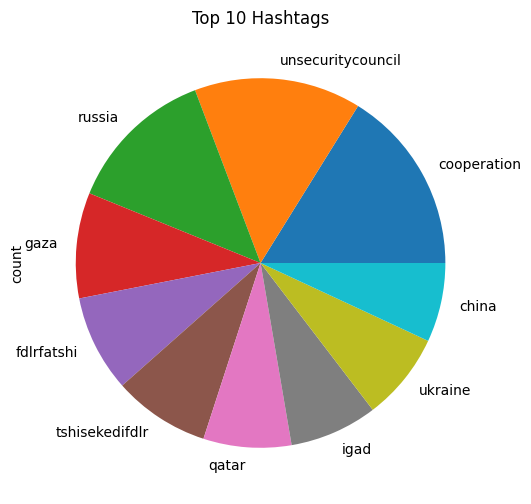

In [102]:
# Hashtag Analysis Visualization
plt.figure(figsize=(10, 6))
top_hashtags.plot(kind='pie', color='skyblue')
plt.title('Top 10 Hashtags')
#plt.xlabel('Hashtag')
#plt.ylabel('Frequency')
#plt.xticks(rotation=45)
plt.show()


In [149]:
# Prepare features and target variable
X = df[['likeCount', 'replyCount', 'isRetweet']]
y = df['retweetCount']

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model performance
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 1.2542928827190227
